In [5]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import SymLogNorm
from multiprocessing import Pool, cpu_count
import os
import time

import bacco

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
#import sbi_tools
import plot_utils
#import scripts
# from scripts import sbi_tools
#from scripts import plot_utils
#import generate_emuPks as genP
import compute_biased_pk_cosmolib as cpk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['font.size'] = 20
mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['axes.facecolor'] = (1,1,1,0)

In [60]:
dir_mocks = '../data/cosmolib/'
tag_pk = '_b1000'
dir_pks = f'../data/pks_cosmolib/pks{tag_pk}'
n_lib = 500

In [3]:
fn_bias_vector = f'{dir_pks}/bias_params.txt'
bias_vector = np.loadtxt(fn_bias_vector)

In [37]:
param_names = ['omega_cold', 'sigma_8', 'h']
param_label_dict = {'omega_cold': r'$\Omega_\mathrm{m}$',
                'sigma8_cold': r'$\sigma_{8}$',
                'sigma_8': r'$\sigma_{8}$',
                'hubble': r'$h$',
                'h': r'$h$',
                'ns': r'$n_\mathrm{s}$',
                'n_s': r'$n_\mathrm{s}$',
                'omega_baryon': r'$\Omega_\mathrm{b}$',}
param_labels = [param_label_dict[param_name] for param_name in param_names]
n_params = len(param_names)

In [93]:
def plot_tracer_field(tracer_field, title=None, normalize=False, show_labels=True,
                      figsize=(6,6)):
        # Set normalisation
        vmax = 1e-4
        if normalize:
            vmax = np.max(np.abs(tracer_field))
        linthresh = 0.01*vmax
        norm = SymLogNorm(
                linthresh=linthresh, linscale=1.0, 
                #linthresh=0.001, linscale=0.001, 
                vmin=-vmax, vmax=vmax
                )

        #field_2d = tracer_field[2,:,:]
        #field_2d = tracer_field[0,:,:]
        field_2d = np.mean(tracer_field[0:10,:,:], axis=0)

        #print(field_2d.shape, np.min(field_2d), np.max(field_2d))
        plt.figure(figsize=figsize, facecolor=(1,1,1,0))
        plt.title(title, fontsize=22)
        ax = plt.gca()        

        plt.imshow(field_2d, norm=norm, cmap='RdBu')
        #cbar = plt.colorbar(label=r'overdensity $\delta$')
        #cbar.ax.tick_params(labelsize=12) 
        if not show_labels:
                
                ax.axes.get_xaxis().set_visible(False)
                ax.axes.get_yaxis().set_visible(False)


        plt.show()

219
(128, 128, 128)
-2.42365276790224e-05 0.00011598676792345941


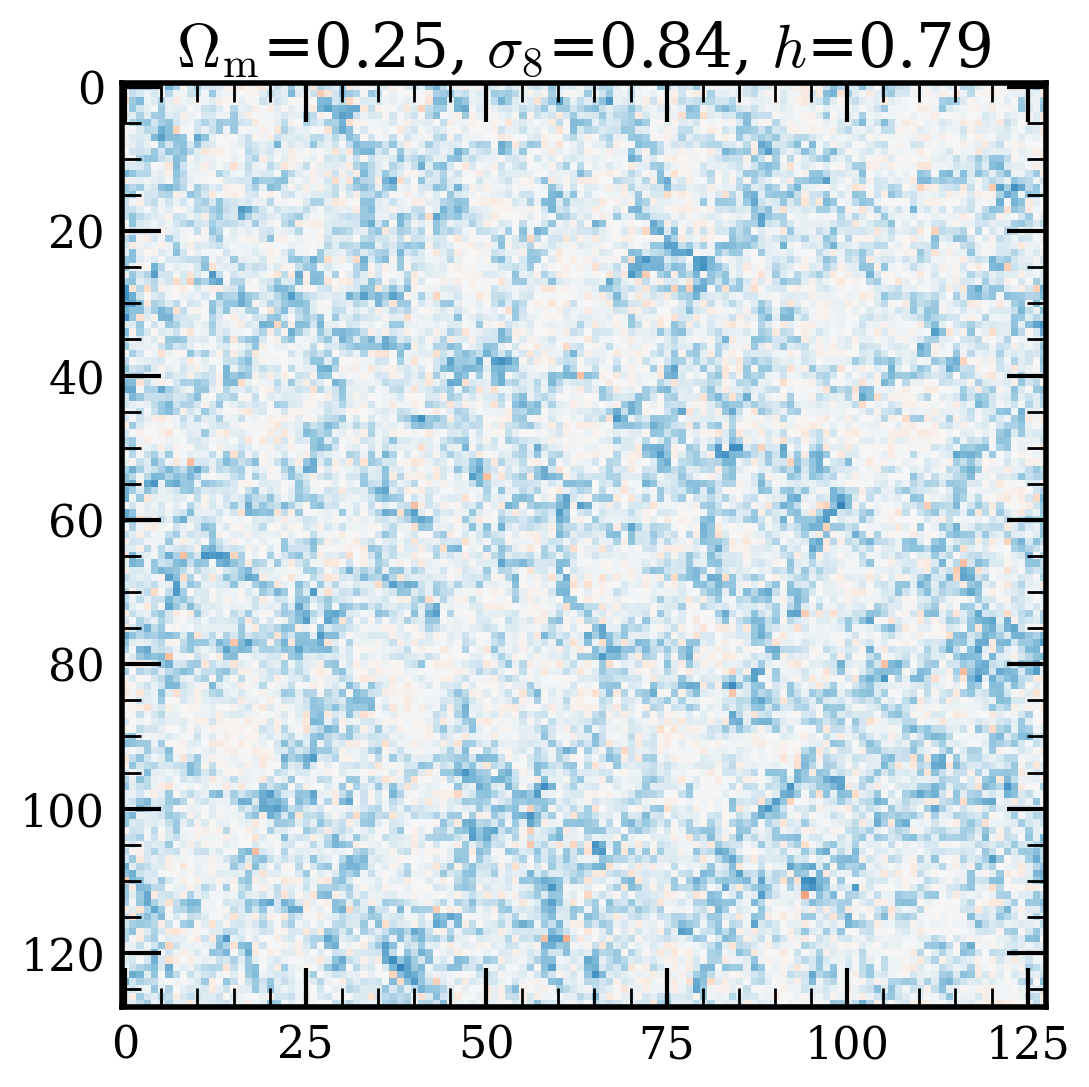

44
(128, 128, 128)
-1.6150785086210817e-05 8.078508108155802e-05


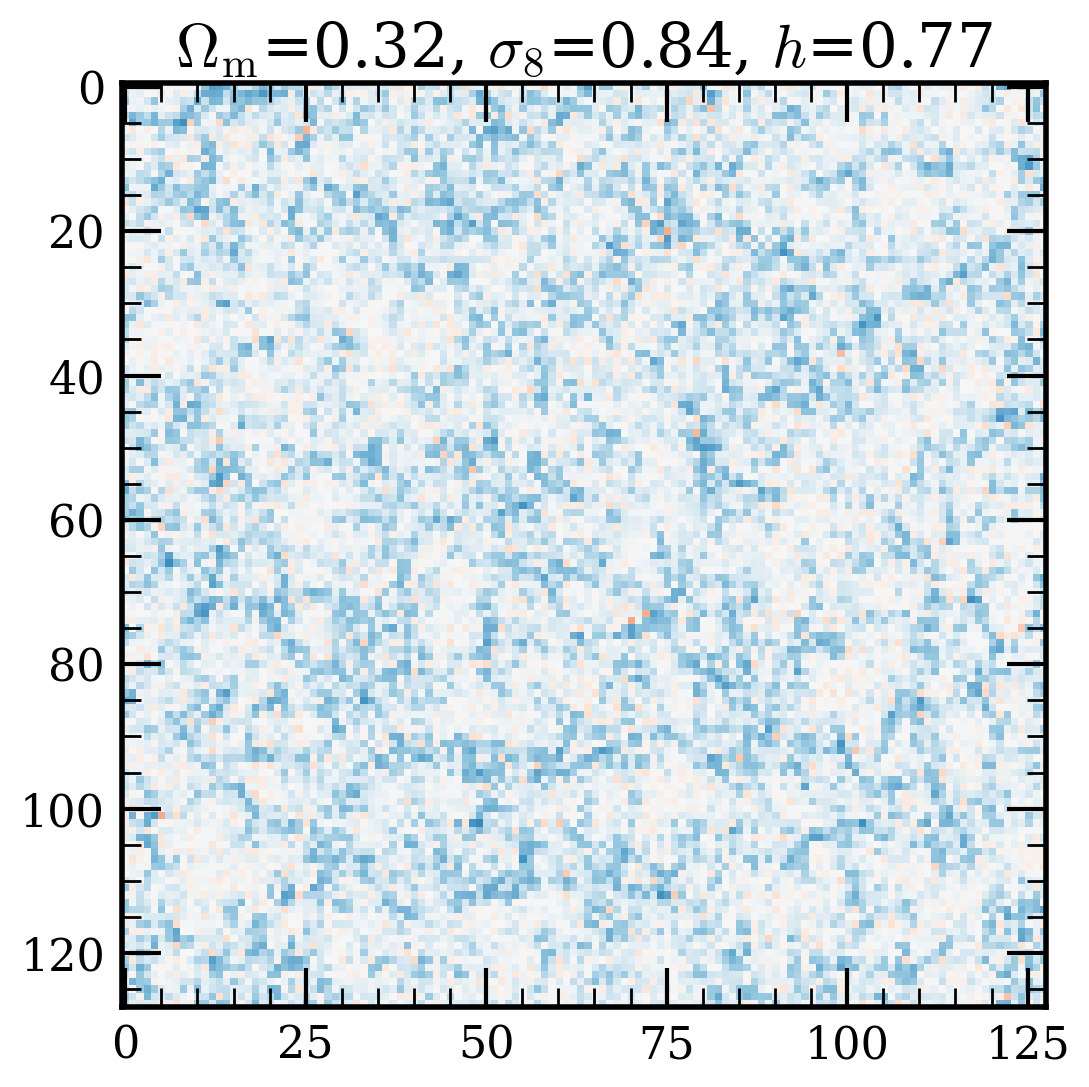

326
(128, 128, 128)
-1.4864518561807927e-05 6.72609603498131e-05


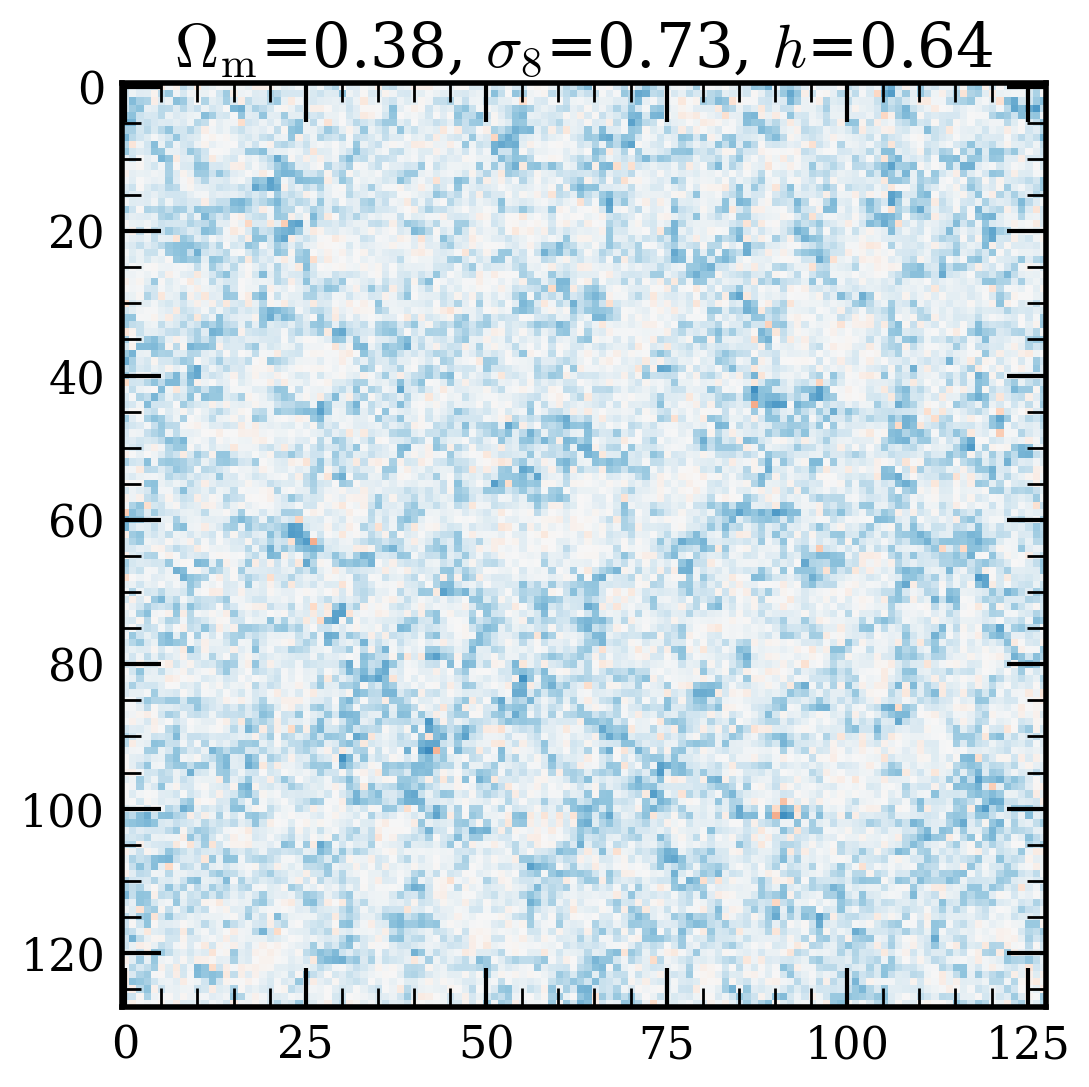

385
(128, 128, 128)
-1.3245331501821056e-05 6.091624891269021e-05


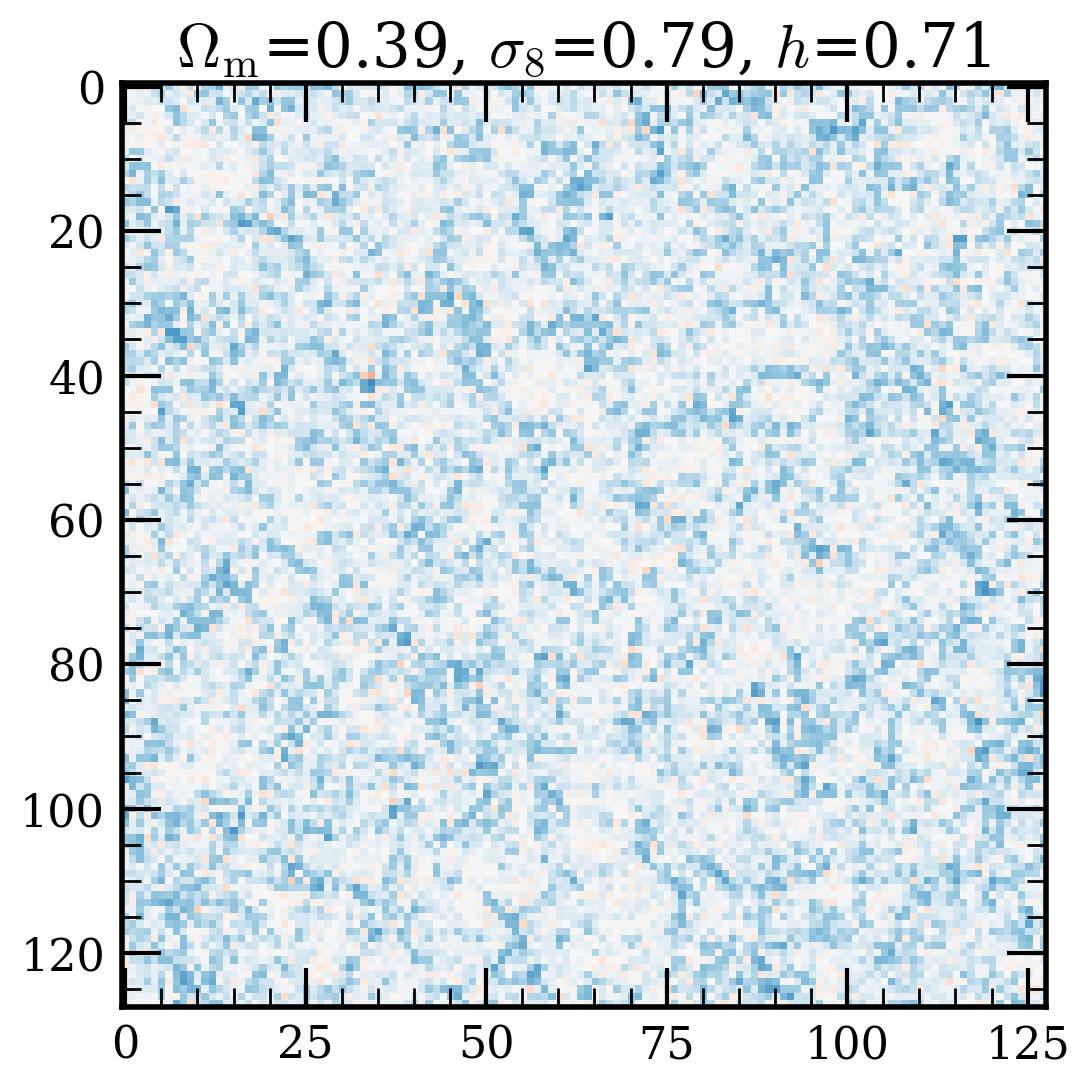

In [95]:
n_plot = 4
rng = np.random.default_rng(42)
idxs_plot = rng.choice(np.arange(n_lib), size=n_plot, replace=False)
for idx_LH in idxs_plot:
    print(idx_LH)
    
    fn_fields = f'{dir_mocks}/LH{idx_LH}/Eulerian_fields_lr_{idx_LH}.npy'
    fn_params = f'{dir_mocks}/LH{idx_LH}/cosmo_{idx_LH}.txt'
    fn_pk = f'{dir_pks}/pk_{idx_LH}.npy'
    
    theta = np.loadtxt(fn_params)
    
    param_strs = [rf"{param_labels[pp]}={theta[pp]:.2}" for pp in range(n_params)]
    title = f", ".join(param_strs)
    
    start = time.time()
    tracer_field = cpk.get_tracer_field(fn_fields, bias_vector)
    print(np.min(tracer_field), np.max(tracer_field))
    
    plot_tracer_field(tracer_field, title=title)

In [91]:
bias_field_labels = ["1-field", r"$\delta$-field", r"$\delta^2$-field",
                     r"$s^2$-field", r"$\nabla^2 \delta$-field"]

In [76]:
%matplotlib inline

44


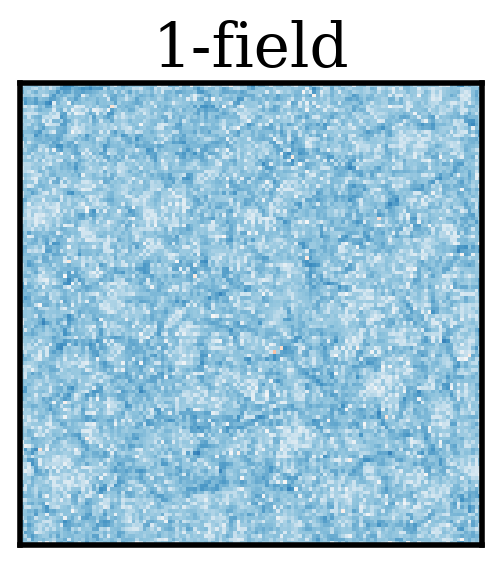

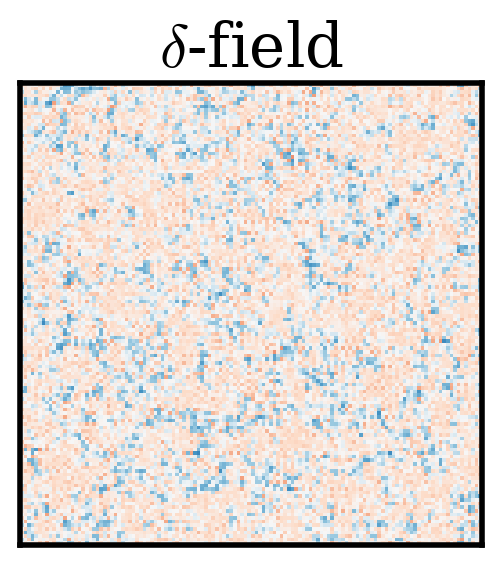

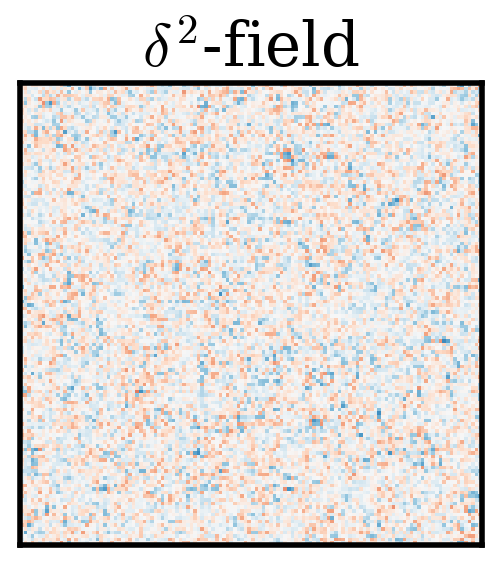

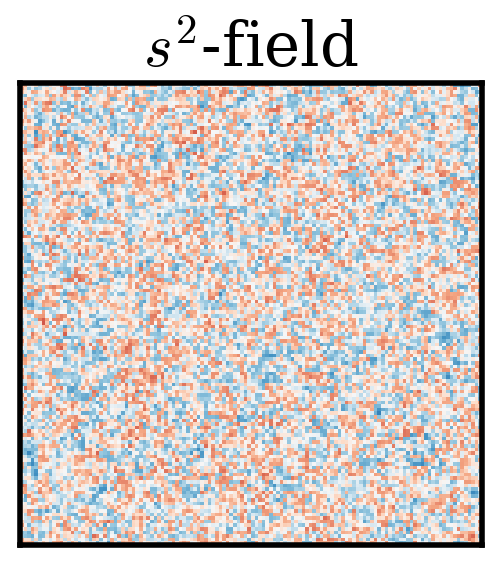

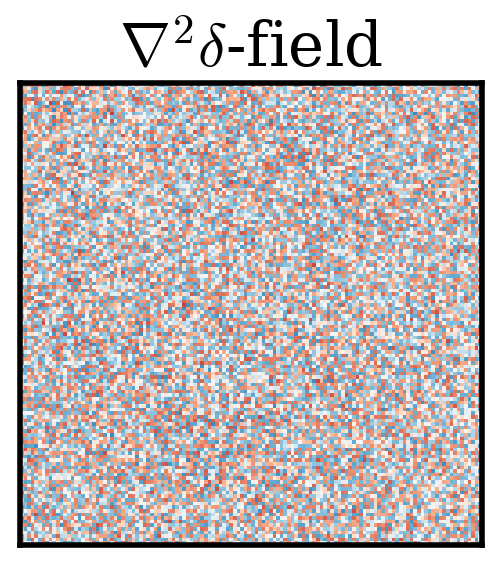

In [94]:
n_plot = 1
rng = np.random.default_rng(42)
idxs_plot = rng.choice(np.arange(n_lib), size=n_plot, replace=False)
for idx_LH in idxs_plot:
    print(idx_LH)
    
    fn_fields = f'{dir_mocks}/LH{idx_LH}/Eulerian_fields_lr_{idx_LH}.npy'
    fn_params = f'{dir_mocks}/LH{idx_LH}/cosmo_{idx_LH}.txt'
    fn_pk = f'{dir_pks}/pk_{idx_LH}.npy'
    
    theta = np.loadtxt(fn_params)
    
    param_strs = [rf"{param_labels[pp]}={theta[pp]:.2}" for pp in range(n_params)]
    title = f", ".join(param_strs)
    
    start = time.time()
    bias_fields_eul = np.load(fn_fields)
    for bb, field in enumerate(bias_fields_eul):
        plot_tracer_field(field, normalize=True, show_labels=False,
                          title=bias_field_labels[bb], figsize=(3,3))#, title=title)
    #tracer_field = cpk.get_tracer_field(fn_fields, bias_vector)
    

In [14]:
idx_LH = 0

In [4]:
param_names = ['omega_cold', 'sigma_8',  'h', 'omega_baryon', 'n_s', 'seed']
param_vals = np.loadtxt(f'{dir_mocks}/LH{idx_LH}/cosmo_{idx_LH}.txt')
param_dict = dict(zip(param_names, param_vals))
print(param_dict)

{'omega_cold': 0.2775274936564327, 'sigma_8': 0.7049140324569382, 'h': 0.7241123952301097, 'omega_baryon': 0.049, 'n_s': 0.9624, 'seed': 0.0}


In [5]:
bias_terms_eul = np.load(f'{dir_mocks}/LH{idx_LH}/Eulerian_fields_lr_{idx_LH}.npy')
print(bias_terms_eul.shape)
for i in range(bias_terms_eul.shape[0]):
    print(np.min(bias_terms_eul[i]), np.max(bias_terms_eul[i]))

(5, 128, 128, 128)
-708.9024 3009.2805
-7.293526e-14 2.5540645e-13
-7.0514404e-30 2.400128e-29
-2.6053875e-30 3.311122e-30
-8.807921e-15 4.77996e-15


In [6]:
n_grid = bias_terms_eul.shape[-1]

In [7]:
norm=n_grid**3
bias_terms_eul_norm = bias_terms_eul/norm

In [8]:
bias_vector = [1., 0., 0., 0.]

In [9]:
bias_terms_eul_0_norm = bias_terms_eul[0]/512**3
tracer_field_eul = bacco.utils.sum_bias_model_terms_py(zeroth=bias_terms_eul_0_norm, 
                                            first=bias_terms_eul[1],
                                            second=bias_terms_eul[2], 
                                            tidal=bias_terms_eul[3], 
                                            laplacian=bias_terms_eul[4], 
                                            b1=bias_vector[0], b2=bias_vector[1], b3=bias_vector[2], 
                                            b4=bias_vector[3], ngrid=128)

tracer_field_eul_norm = tracer_field_eul/np.mean(tracer_field_eul)
tracer_field_eul_norm128 = tracer_field_eul/128**3
tracer_field_eul_norm512 = tracer_field_eul/512**3

In [10]:
bias_vector_b1is0 = [0., 0., 0., 0.]
tracer_field_eul_b1is0 = bacco.utils.sum_bias_model_terms_py(zeroth=bias_terms_eul_0_norm, 
                                            first=bias_terms_eul[1],
                                            second=bias_terms_eul[2], 
                                            tidal=bias_terms_eul[3], 
                                            laplacian=bias_terms_eul[4], 
                                            b1=bias_vector_b1is0[0], b2=bias_vector_b1is0[1], b3=bias_vector_b1is0[2], 
                                            b4=bias_vector_b1is0[3], ngrid=128)

tracer_field_eul_b1is0_norm = tracer_field_eul_b1is0/np.mean(tracer_field_eul_b1is0)
tracer_field_eul_b1is0_norm128 = tracer_field_eul_b1is0/128**3
tracer_field_eul_b1is0_norm512 = tracer_field_eul_b1is0/512**3

In [11]:
np.mean(tracer_field_eul), np.mean(tracer_field_eul_b1is0)

(4.7683713e-07, 4.7683713e-07)

In [12]:
print(tracer_field_eul.shape, np.min(tracer_field_eul), np.max(tracer_field_eul))
print(tracer_field_eul_norm.shape, np.min(tracer_field_eul_norm), np.max(tracer_field_eul_norm))
print(tracer_field_eul_norm512.shape, np.min(tracer_field_eul_norm512), np.max(tracer_field_eul_norm512))

(128, 128, 128) -5.2817345e-06 2.2420887e-05
(128, 128, 128) -11.076601 47.02001
(128, 128, 128) -3.935198860023116e-14 1.6704862590855712e-13
